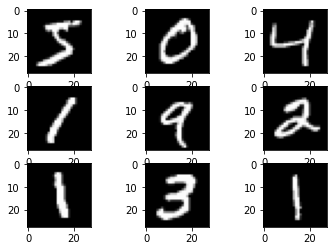

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import cv2



(trainX, trainY), (testX, testY) = mnist.load_data()

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [2]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainX= trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

trainX, trainY = shuffle(trainX, trainY, random_state=0)

#print(trainX[0].shape)

In [456]:
# 3 conv layers(32,64,128) , 1 fully connected layer (64), one output later
model = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# 2 conv layers(64,64) , 2 fully connected layer (64, 32), one output later
model_2 = keras.models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# 2 conv layers(32,64) , 1 fully connected layer (64), one output later
model_3 = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# 1 conv layer(32) , 2 fully connected layers (64, 32), one output later
model_4 = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=trainX[0].shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


#print(model_3.summary())

In [408]:
def run(m, epochs):
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    fitting = m.fit(trainX, trainY, epochs=epochs, validation_split= 0.25)

    # if validation acc < acc => overfitting (incase of overfitting => dropout layers)
    # if validation acc almost = acc => doing well
    print(fitting)

    (testLoss, testAcc) = m.evaluate(testX, testY)
    print("\nTest loss accuracy: ", testLoss, "\nTest validation accuracy: ", testAcc, "\n")

    prediction = m.predict(testX)
    prediction_arr = [np.argmax(i) for i in prediction]
    print(prediction_arr[:6])

    for i in range(6):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()

In [420]:
def predict_image(m, image):
    #add image and predict
    img=plt.imread(image)
    plt.imshow(img)

    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    resized= cv2.resize(gray,(28,28),interpolation= cv2.INTER_AREA)
    #print(gray.shape)

    newIMG=keras.utils.normalize(resized, axis=1) 
    newIMG= np.array(newIMG).reshape(-1, 28, 28, 1) 

    prediction = m.predict(newIMG)
    print("\npredicted nummber : ", np.argmax(prediction))

Epoch 1/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.1658 - accuracy: 0.9494 - val_loss: 0.0741 - val_accuracy: 0.9775
Epoch 2/10
1407/1407 [==============================] - 39s 28ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0558 - val_accuracy: 0.9826
Epoch 3/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0399 - val_accuracy: 0.9876
Epoch 4/10
1407/1407 [==============================] - 42s 30ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9904
Epoch 5/10
1407/1407 [==============================] - 42s 30ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0352 - val_accuracy: 0.9899
Epoch 6/10
1407/1407 [==============================] - 42s 30ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0307 - val_accuracy: 0.9909
Epoch 7/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0477 -

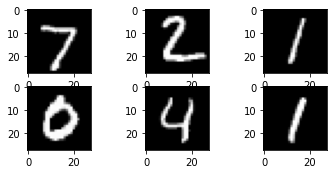

In [457]:
run(model_3,10)


predicted nummber :  4


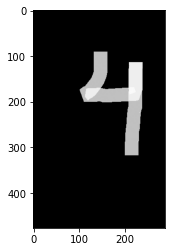

In [460]:
predict_image(model_3, r'C:\Users\nada\OneDrive\Desktop\4r.png')